In [1]:
from IPython.display import HTML

# Student Performance

*Mattia Tarquinio s265802*

## Introduction

This work is based on the analysis of a dataset concerning the performance of some Portuguese students of secondary school and some personal information related to them. It was used to see if it could be traced back to which were the things that most influenced the school performance of a Portuguese boy in the two main subjects Mathematics and Portuguese language. The two datasets (one for each subject) contain the same attributes that are shown below:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

The value on which we try to make predictions is the one named G3, represents the vote at the end of the year and is therefore the one that determines the success or failure of the school year.


## Data exploration

Let's explore a bit more deeply our datasets, in particular we see immediately their size and whether they have zero or missing values:


In [2]:
import pandas as pd
import io
import numpy as np


import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest, RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import statsmodels.api as sm
#import graphviz 
from collections import defaultdict

In [3]:

dataMat = pd.read_csv("/Users/matti/OneDrive/Desktop/Università/DataSpaces/student/student-mat.csv", sep=';')
dataPor = pd.read_csv("/Users/matti/OneDrive/Desktop/Università/DataSpaces/student/student-por.csv", sep=';')

print("The dataset about Mathematics has %d rows and %d columns " % dataMat.shape + "and has " + ("some" if dataMat.isnull().values.any() else "no")  + " missing values.")
print("The dataset about Portuguese language has %d rows and %d columns " % dataPor.shape + "and has " + ("some" if dataPor.isnull().values.any() else "no")  + " missing values.")



The dataset about Mathematics has 395 rows and 33 columns and has no missing values.
The dataset about Portuguese language has 649 rows and 33 columns and has no missing values.


In [4]:
best_estimators = {}

value_comparison_w = { 'Weighted average': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier'], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc' :[]}
value_comparison_macro = {'Macro average': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier'], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc' :[]}
value_comparison_micro = {'Classifier / Measures': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier'], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc' :[]}

First of all it can be interesting how the grades of the students contained in these datasets are distributed so that we can better understand the results. Following the suggestion of Paulo Cortez and Alice Silva's paper [2] it was decided to analyze the students' grades in three ways:
- Using their grades, which range from 1 to 20;


- Using a 5-level classification based on the Erasmus1
grade conversion system;
    * grades between 0-9 = 1 
    * grades between 10-11 = 2
    * grades between 12-13 = 3
    * grades between 14-15 = 4
    * grades between 16-20 = 5
    
    
- Using a binary grade system, success/failure.
    * grades between 0-9 (year failed) = 1 
    * grades between 10-20 (year passed) = 2 

They are all represented below so that we can compare them quickly and clearly.


In [5]:
gradesMat = dataMat["G3"].value_counts().sort_index()
#print(gradesMat.values)
#print(gradesMat.index)

yMat = gradesMat.values
xMat =[]
for n in gradesMat.index:
  xMat.append(str(n))

gradesPor = dataPor["G3"].value_counts().sort_index()
#print(gradesPor.values)
#print(gradesPor.index)

yPor = gradesPor.values
xPor =[]
for n in gradesPor.index:
  xPor.append(str(n))

def valueToSwitch(n):
    if(n<=9):
      return 0
    if(n==10 or n==11):
      return 1
    if(n==12 or n==13):
      return 2
    if(n==14 or n==15):
      return 3
    else:
      return 4


fiveLevelGradesMat = [0,0,0,0,0]
fiveLevelGradesPor = [0,0,0,0,0]

for grade, quantity in gradesMat.items():
    level = valueToSwitch(grade)
    fiveLevelGradesMat[level] = fiveLevelGradesMat[level] + quantity

for grade, quantity in gradesPor.items():
    level = valueToSwitch(grade)
    fiveLevelGradesPor[level] = fiveLevelGradesPor[level] + quantity
    
  


In [6]:
colors = plotly.colors.DEFAULT_PLOTLY_COLORS

binaryGradesMat = [fiveLevelGradesMat[0], fiveLevelGradesMat[1]+fiveLevelGradesMat[2]+fiveLevelGradesMat[3]+fiveLevelGradesMat[4]]
binaryGradesPor = [fiveLevelGradesPor[0], fiveLevelGradesPor[1]+fiveLevelGradesPor[2]+fiveLevelGradesPor[3]+fiveLevelGradesPor[4]]

# Create figure
fig = go.Figure()

fiveLevel = ['0-9', '10-11', '12-13', '14-15', '16-20']
twoLevel = ['Fail', 'Pass']

colors20L = [colors[2]]*len(xMat)
for i in list(range(0,7)):
    colors20L[i] = colors[3]

    
colors5L = [colors[2]]*5
colors5L[0] = colors[3]

colors2L = [colors[3],colors[2]]

fig.add_trace(
        go.Bar(
            visible=False,
            marker_color=colors20L,
            name='20Level Mat',
            x=xMat,
            y=yMat,
            text=yMat,
            textposition='auto'))

fig.add_trace(
        go.Bar(
            visible=False,
             marker_color=colors5L,
            name='5Level Mat',
            x=list(range(1,6)),
            y=fiveLevelGradesMat,
            text=fiveLevelGradesMat,
            textposition='auto'))

fig.add_trace(
        go.Bar(
            visible=False,
            marker_color=colors2L,
            name='2Level Mat',
            x=list(range(1,3)),
            y=binaryGradesMat,
            text=binaryGradesMat,
            textposition='auto'))

fig.add_trace(
         go.Bar(
            visible=False,
            marker_color=colors20L,
            name='20Level Por',
            x=xPor,
            y=yPor,
            text=yPor,
            textposition='auto'))
fig.add_trace(
         go.Bar(
            visible=False,
            marker_color=colors5L,
            name='5Level Por',
            x=list(range(1,6)),
            y=fiveLevelGradesPor,
            text=fiveLevelGradesPor,
            textposition='auto'))

fig.add_trace(
         go.Bar(
            visible=False,
            marker_color=colors2L,
            name='2Level Por',
            x=list(range(1,3)),
            y=binaryGradesPor,
            text=binaryGradesPor,
            textposition='auto'))


fig.data[0].visible = True

# Create and add slider
steps = []
labels = ['20 Level Mat', '5 Level Mat', '2 Level Mat', '20 Level Por', '5 Level Por', '2 Level Por']
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label = labels[i]
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Grades: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    xaxis = dict(
        tickmode='linear'),
    sliders=sliders,
    barmode='group',
    title='Various rappresentation of G3 grades in Mathematics and Portuguese Lanaguage',
    xaxis_title="Grade",
    yaxis_title="#student"
)

fig.show()

We can see from the graphs how the situation is complicated especially in mathematics where 1/3 of the students fail to get a sufficient evaluation at the end of the year. Even looking at the graph with the representation at twenty levels we can see that the majority of the students get a barely sufficient evaluation and therefore can not reach a good level on the subject.
As for the Portuguese, the results are certainly better, even looking at the insufficient grades you can see that they all group around the sufficiency, indicating less serious situations.
Of interest are certainly the many boys who have zero assessment, the reason has not been specified, but it is likely to indicate some boys who have left school, so it is important to understand which factors influenced them more.

I have therefore decided to bring the grades for all three periods of teaching (G1, G2, G3) to a simple track so that I can understand what most influences a failure. Before, however, I had to transform all the binary columns that were expressed with yes/no through a 1/0 correspondence, but above all the categorical attributes were transformed by hot encoding. 
To give a practical example before this action the Mjob attribute, representing the mother's job, was an attribute that could have 5 values ('teacher', 'health' care related, civil 'services', 'at_home' or 'other'), after the use of hot encoding, there will be 5 different columns each binary and only the column indicating the mother's job will have a 1 inside. 
All this work will allow us to calculate a correlation matrix and understand more clearly which value of a given attribute will most influence the success or failure of the school year.

I then calculated a correlation matrix and from this I took the attributes that had an absolute correlation (both positive and negative) with the highest G3, at least 10%.

In [7]:
#CAPIRE SE ALCUNE CATEGORIE BINARIE VANNO CODIFICATE COME 1/0 OPPURE COME DUMMY

#cleanup_nums = {"yes": 1, "no": 0}
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 1, "MS": 0, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0}

dataMat.replace(cleanup_nums, inplace=True)
dataPor.replace(cleanup_nums, inplace=True)


#dataMatExt= pd.get_dummies(dataMat, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"])
#dataPorExt= pd.get_dummies(dataPor, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"])

dataMatExt= pd.get_dummies(dataMat, columns=[ "Mjob", "Fjob", "reason", "guardian"])
dataPorExt= pd.get_dummies(dataPor, columns=["Mjob", "Fjob", "reason", "guardian"])

#print(dataMatExt.columns)

#G1, G2, e G3 li faccio diventare binari così da semplificare e capire meglio quali attributi siano collegati a una promozione o bocciatura
def gradesToBinary(x):
  if(x>9):
    return 1
  else:
    return 0

fiveLevel = ['0-9', '10-11', '12-13', '14-15', '16-20']

def gradesTo5L(x):
    if(x<10):
        return 0
    elif (x==10 or x==11):
        return 1
    elif (x==12 or x==13):
        return 2
    elif (x==14 or x==15):
        return 3
    else:
        return 4
    

dataMat20L = dataMatExt.copy()
dataPor20L = dataPorExt.copy()

dataMat5L = dataMatExt.copy()
dataPor5L = dataPorExt.copy()

dataMat5L['G3'] = dataMat5L['G3'].map(gradesTo5L)
dataMat5L['G2'] = dataMat5L['G2'].map(gradesTo5L)
dataMat5L['G1'] = dataMat5L['G1'].map(gradesTo5L)

dataPor5L['G3'] = dataPor5L['G3'].map(gradesTo5L)
dataPor5L['G2'] = dataPor5L['G2'].map(gradesTo5L)
dataPor5L['G1'] = dataPor5L['G1'].map(gradesTo5L)


dataMatExt['G1'] = dataMatExt['G1'].map(gradesToBinary)
dataMatExt['G2'] = dataMatExt['G2'].map(gradesToBinary)
dataMatExt['G3'] = dataMatExt['G3'].map(gradesToBinary)

dataPorExt['G1'] = dataPorExt['G1'].map(gradesToBinary)
dataPorExt['G2'] = dataPorExt['G2'].map(gradesToBinary)
dataPorExt['G3'] = dataPorExt['G3'].map(gradesToBinary)

#calculate correlation matrix
cor1 =dataMatExt.corr()

cor2 = dataPorExt.corr()


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


#take the lower trinagular pairs
correlationCouple = cor1.unstack().drop(labels=get_redundant_pairs(cor1))

correlationCouplePor = cor2.unstack().drop(labels=get_redundant_pairs(cor1))

#Stampa le coppie maggiormente correlate
#cc = correlationCouple.sort_values(ascending=False)
#print(cc)

#for x,y in zip(cc.index, cc):
#    print(x,y)

#take only the value associated with G3
correlationCoupleG3 = correlationCouple.xs('G3', level=0, drop_level=False).append(correlationCouple.xs('G3', level=1, drop_level=False)).sort_values(ascending=False)


correlationCoupleG3Por = correlationCouplePor.xs('G3', level=0, drop_level=False).append(correlationCouplePor.xs('G3', level=1, drop_level=False)).sort_values(ascending=False)
#print(correlationCoupleG3) 

def top_correlated(data, s):
    i = 0
    topIndex =  []
    topValue = []
    if(s=="M"):
        value = 0.09
    else:
        value = 0.1
    
    for x in data:
        if(x>value or x< -value):
          #print(x)
          tmp1 =x
          tmp2 = data.index[i]
          topIndex.append(tmp2)
          topValue.append(tmp1)
        i = i +1

    top = dict(zip(topValue, topIndex))
    return top
   

#topCorrelated = correlationCoupleG3.iloc[:5].append(correlationCoupleG3.iloc[correlationCoupleG3.size-5:])

#Coppie con correlazione > |0.09|
topCorrelated = top_correlated(correlationCoupleG3, "M")

topCorrelatedPor = top_correlated(correlationCoupleG3Por, "M")

topValuePos= []
topValueNeg= []
topIndexPos=[]
topIndexNeg = []

for x, y in topCorrelated.items():
  if(x>0):
    topValuePos.append(x)
    if(y[0]=='G3'):
      topIndexPos.append(y[1])
    else:
      topIndexPos.append(y[0])
  else:
    topValueNeg.append(x) 
    if(y[0]=='G3'):
      topIndexNeg.append(y[1])
    else:
      topIndexNeg.append(y[0])
    
topValuePosPor= []
topValueNegPor= []
topIndexPosPor=[]
topIndexNegPor = []

for x, y in topCorrelatedPor.items():
  if(x>0):
    topValuePosPor.append(x)
    if(y[0]=='G3'):
      topIndexPosPor.append(y[1])
    else:
      topIndexPosPor.append(y[0])
  else:
    topValueNegPor.append(x) 
    if(y[0]=='G3'):
      topIndexNegPor.append(y[1])
    else:
      topIndexNegPor.append(y[0])    

#Non rappresentiamo G1 e G2 perchè la loro correlazione è evidente e non permettono una buona rappresentazione degli altri elementi


fig = go.Figure()

fig.add_trace(go.Bar(x=topIndexPos[2:], y=topValuePos[2:],
                base=0,
                marker_color=colors[9],
                name='positive correlation Mat',
                hoverinfo='text',
                hovertext = [(x,y) for (x,y) in zip(topIndexPos[2:], topValuePos[2:])]
                ))

fig.add_trace(go.Bar(x=topIndexNeg, y=[abs(ele) for ele in topValueNeg],
                base=topValueNeg,
                marker_color= colors[8],
                name='negative correlation Mat',
                hoverinfo='text',
                hovertext =[(x,y) for (x,y) in zip(topIndexNeg, topValueNeg)]))

fig.add_trace(go.Bar(x=topIndexPosPor[2:], y=topValuePosPor[2:],
                base=0,
                marker_color=colors[1],
                name='positive correlation Por',
                hoverinfo='text',
                hovertext = [(x,y) for (x,y) in zip(topIndexPosPor[2:], topValuePosPor[2:])]
                ))

fig.add_trace(go.Bar(x=topIndexNegPor, y=[abs(ele) for ele in topValueNegPor],
                base=topValueNegPor,
                marker_color= colors[0],
                name='negative correlation Por',
                hoverinfo='text',
                hovertext =[(x,y) for (x,y) in zip(topIndexNegPor, topValueNegPor)]))

fig.data[2].visible = False
fig.data[3].visible = False

stepsG3 = []
labels = ['Mathematic', 'Mathematic', 'Portuguese Language']
for i in range(len(fig.data)):
    if(i==0 or i==2):
        step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label = labels[i]
        )
        step["args"][1][i] = True  # Toggle i'th trace to "visible"
        step["args"][1][i+1] = True  # Toggle i'th trace to "visible"
        stepsG3.append(step)
    

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Subject:   "},
    pad={"t": 70},
    steps=stepsG3
)]

fig.update_layout(
    sliders=sliders,
    barmode='group',
    title='Most important attributes correlated to Grade',
    xaxis_title="Attribute",
    yaxis_title="Correlation with G3"
)

fig.show()



In this graph I chose not to represent what were the two attributes with the highest correlation, I'm obviously talking about G1 and G2 that had a correlation between 0.8 and 0.6. Such a high correlation was predictable as it's easy to guess that if a boy has a positive grade during the year he's likely to pass it. However, I decided not to represent them because such high values would have made the others less understandable.

A high positive correlation means that the attribute and G3=1 are present in the same record a large number of times, or that as the value of that attribute increases the possibility that the value of G3 is positive. On the contrary, a negative correlation indicates that as a given attribute increases, it is likely that the final grade will not be sufficient.

Looking at both graphs we can see that the most negatively correlated value to the final grade are the number of previous failures, an indicator of a boy who has already shown to have difficulties in school. Other common value are age (in case of higher age the boy has already met failures) and  among the positive correlated attributes we can identify the desire to continue the studies (higher) and education of both father and mother.
The other values are different to a graph from another, this could indicate either that there are different factors influencing the trend in different subjects, or that they are values that could change significantly by changing samples because we are facing very low correlations.

Looking at the differences between the graphs, however, we could make some hypothesis, for example it may be interesting to see, in the Math's one, how it seems to be relevant the fact that a boy is entrusted to guardians who are neither the father nor the mother (guardian_other), this is may reflect a situation that does not favor the boy's tranquility. 
On the other hand, with regard to the values in the graph of the Portuguese language we can see how alcohol consumption is negatively correlated to the grade, in the case of higher correlation values we could hypothesize that while mathematics requires more natural predisposition, the Portuguese language simply requires a lifestyle appropriate to a student that allows him to concentrate on studying and obviously alcohol consumption conflicts with this.

This can be a good start to identify patterns and try to better understand which behavioural and environmental factors influence the boy's success at school more clearly. Obviously, in order to make the hypotheses I have proposed even considerable, higher correlation values would certainly be needed, but I believe that this could still be a good exercise to understand the importance of correlation and to reason about it.





### k-Fold Cross-validation

Before introducing the various models used, I would like to say a few words about a technique that I used to improve the results. It is the k-Fold Cross-validation, through which I can estimate the test error more accurately and then understand which configuration optimizes the parameters in question.
K-Fold because the test set is divided into K sets and in each iteration one of them is used as validation set and the others as train set, in this way you get a series of MSE (if we are talking about regression) or accuracies (for the classification) of which the average is made, thus obtaining a result less dependent on the choice of input data.
For the models I kept some fairly standard choices choosing k = 5 or 10.

In [8]:

df_merge20 = pd.concat([dataMat20L, dataPor20L])
df_merge5 = pd.concat([dataMat5L, dataPor5L])
df_merge = pd.concat([dataMatExt, dataPorExt])

The dataset lends itself to be analyzed both through regression and classification, in particular I decided to treat the dataset differently depending on which model I'm going to apply. 
First we will deal with regression.

## Linear Regression

The Linear Regression is one of the simplest supervised models to apply to a data set, it allows to give a quantitative response to the data that is submitted to it through a linear function of one or more features that approximates the arrangement of samples in multidimensional space, in fact the model that we will use is a **Multiple Linear Regression**

If we want to define it more strictly we can say that given $x = x_1, x_2, ... , x_n$ a vector of $n$ features and $n+1$ coefficients or parameters $\beta = \beta_0, \beta_1, ... , \beta_n$ . The relation that links the result $Y$ with the features in input $X$ is 

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + ... + \hat{\beta_n} x_n + \epsilon$$

Where the vector $\hat{\beta}$ is the vector of the model parameters that must therefore be estimated, to allow a quantitative estimate $\hat{y}$ as close as possible to the real value of $y$ of the sample under examination. The constants have the role to parameterize the importance of the various features, in case of null hypothesis the prediction will be just $\hat{\beta_0}$, called *intercept*.
The term $\epsilon$  represent the error of the model and serves to collect all the inaccuracies of the regression, often due mainly to the fact that a relationship is almost always linearly approximated.

To apply Linear Regression I have chosen to merge the datasets for both subjects and use the grades from all three periods in the 20 level and 5 level form to see which one we would have better results on, so given a student's data the Linear Regression should give us his grade (so it is a quantitative result) on the scale we are analysing.


In order to try to improve the results obtained, I decided to try to decrease the number of features used for the regression, as we have seen from the correlation graphs, most of them are completely disconnected from the final result. That's why I decided to apply a form of *subset selection*. Having a fairly high $p$ (number of predictors), a best subset selection would have needed a lot of computational resources or a lot of time, so I opted for **Forward Stepwise Selection**. Whose algorithm taken from the source [1] is shown below:

1. Let $M_0$ denote the null model, which contains no predictors.
2. For $k$ = 0, . . . , $p$ − 1:
    a.  Consider all $p − k$ models that augment the predictors in $M_k$ with one additional predictor.
    b. Choose the best among these $p − k$ models, and call it $M_k+1$. Here best is defined as having smallest RSS or highest R2.
3. Select a single best model from among $M_0, . . . ,M_p$ using crossvalidated prediction error, Cp (AIC), BIC, or adjusted R2.

I then implemented the algorithm described above, choosing for the last point to use cross validation, because if computationally feasible it turns out to be the most reliable solution to select the model that will perform best on a test set.

Finally, after obtaining sub-optimal results, I returned to observe the data with the help of the data exploration phase, what I noticed is that the large amount of records in which $G3 = 0$ could have numerous meanings, both of data not collected, but also and above all of a boy who had not finished the school year or who had retired. They are records so certainly useful to try to see the reasons behind the failure of a year (which will be done later with the classification), but certainly not optimal if we talk about perform regression more accuratly possible on the grade, these data are in fact outliers for our model, heavily influencing the choice. That's why I decided to apply the *Linear Regression* without this data and see if the results would have improved.

Finally I fit the models also used as predictors only G1 and G2 that are the two features more correlated with G3 to see how much the other features really affect them.



In [9]:
import itertools
#from tqdm import tnrange, tqdm_notebook

def fit_linear_reg(X,Y):
        #Fit linear regression model and return RSS and R squared values
        model_k = LinearRegression()
        model_k.fit(X,Y)
        RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
        R_squared = model_k.score(X,Y)
        return RSS, R_squared


def Forward_stepwise_selection(data2):

    
    y_data = data2.loc[:,['G3']]
    x_data = data2.loc[:, data2.columns != 'G3']

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

    k = 45

    remaining_features = list(x_data.columns.values)
    features = []
    RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
    features_list = dict()

    for i in range(1,k+1):
        best_RSS = np.inf
        best_R_squared = np.inf

        for combo in itertools.combinations(remaining_features,1):

                RSS = fit_linear_reg(x_data[list(combo) + features],y_data)   #Store temp result 

                if RSS[0] < best_RSS:
                    best_RSS = RSS[0]
                    best_R_squared = RSS[1] 
                    best_feature = combo[0]

        #Updating variables for next loop
        features.append(best_feature)
        remaining_features.remove(best_feature)

        #Saving values for plotting
        RSS_list.append(best_RSS)
        R_squared_list.append(best_R_squared)
        features_list[i] = features.copy()

    #print('Forward stepwise subset selection')
    #print('Number of features |', 'Features |', 'RSS |', 'R^2')
    #display([(i,features_list[i], round(RSS_list[i]), round(R_squared_list[i])) for i in range(1,6)])


    scores = list()
    scores_std = list()
    for lst in list(features_list.values()):
        lr = LinearRegression()
        x_tmp = x_data.loc[:,lst]

        this_scores = cross_val_score(lr, x_tmp, y_data, cv=10, scoring='r2')
        
        #this_scores = cross_val_score(lr, x_tmp, y_data, cv=10, scoring='neg_mean_squared_error')
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores))

    max_score = max(scores)
    max_index = scores.index(max_score)

    #print('Best score on crossvalidation: ', features_list[max_index], ' = ', round(max_score, 4))
    
    return(features_list[max_index])
    
    

In [10]:
features = set()
result_lr = {}

def linReg(data, selection, label) :
    
    y_Mat20L = data.loc[:,['G3']]
    x_Mat20L = data.loc[:, data.columns != 'G3']
    
    x_train, x_test, y_train, y_test = train_test_split(x_Mat20L, y_Mat20L, test_size=0.2, random_state=42)
    
    #print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    train_set = x_train.join(y_train)
    
    #print(train_set.shape)
    
    if(selection):
        best_features = Forward_stepwise_selection(train_set)
    else:
        best_features = list(train_set.columns)
        best_features.remove('G3')
    
    features.update(best_features)
    
    #y_Mat20L = data.loc[:,['G3']]
    #x_Mat20L = data.loc[:, data.columns != 'G3']
    #x_Mat20L = x_Mat20L.loc[:, best_features]
    
    x_train = x_train.loc[:, best_features]
    x_test = x_test.loc[:, best_features]
    
    #print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    #x_train, x_test, y_train, y_test = train_test_split(x_Mat20L, y_Mat20L, test_size=0.2, random_state=42)
    

    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    #print('Results on test dataset ')

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    #print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    #print('R^2 statistic: %.2f'% r2_score(y_test, y_pred))
    # F-statistic
    #print('F-statistic: %.2f'% f1_score(y_test, y_pred))
    
    result_lr[label] = (mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
    
    



In [11]:
'''
indToDrop = dataMat20L[dataMat20L['G3'] == 0].index
dataMat20LNoOut = dataMat20L.drop(indToDrop)

linReg(dataMat20LNoOut, True)

indToDrop = dataMat5L[dataMat5L['G3'] == 0].index
dataMat5LNoOut = dataMat5L.drop(indToDrop)

linReg(dataMat5LNoOut, True)
'''
#print('Linear Regression with grades on 20 Levels')
linReg(df_merge20, False, '20L noSelection')
#print()

#print('Linear Regression with grades on 20 Levels')
linReg(df_merge20, True, '20L')
#print()

linReg(df_merge20.loc[:,['G1','G2', 'G3']], False, '20L features(G1,G2)')
#print()

indToDrop = df_merge20[df_merge20['G3'] == 0].index
df_merge20NoOut = df_merge20.drop(indToDrop)

linReg(df_merge20NoOut, True, '20L NoOutliers')


#print()

#print('Linear Regression with grades on 5 Levels')
linReg(df_merge5, False, '5L noSelection')
#print()


#print('Linear Regression with grades on 5 Levels')
linReg(df_merge5, True, '5L')
#print()

linReg(df_merge5.loc[:,['G1','G2', 'G3']], False, '5L features(G1,G2)')



#print()

df_merge5NoOut = df_merge5.drop(indToDrop)
linReg(df_merge5NoOut, True, '5L NoOutliers')


r2_list = []
mse_list = []
model_list = []
for k,v in result_lr.items():
    mse_list.append(v[0])
    r2_list.append(v[1])
    model_list.append(k)

    

    



In [12]:

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=model_list,
    y=mse_list,
    marker=dict(color="crimson", size=12),
    mode='lines+markers',
    name="MSE",
))

fig.add_trace(go.Scatter(
    x=model_list,
    y=r2_list,
    marker=dict(color="gold", size=12),
    mode='lines+markers',
    name="R^2",
))

fig.data[1].visible = False

stepsG3 = []
labels = ['MSE', 'R^2']
for i in range(len(fig.data)):
    
    step = dict(
    method="restyle",
    args=["visible", [False] * len(fig.data)],
    label = labels[i]
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    #step["args"][1][i+1] = True  # Toggle i'th trace to "visible"
    stepsG3.append(step)
    

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Evaluation Method:   "},
    pad={"t": 90},
    steps=stepsG3
)]

fig.update_layout(
    sliders=sliders,
    barmode='group',
    title="MSE and R^2 in every model",
    xaxis_title="Model",
    yaxis_title="Value"
)


fig.show()

The graph allows us to see the two evaluation metrics chosen to see the effectiveness of the various trained models, $MSE$ and $R^2$.

$MSE$ or *Mean Squared Error*, allows us to see how far on average the points are from our linear function which should approximate their trend, so obviously it must be as small as possible. However, it is relative to the reference system, in fact as we can see the MSE of the 20 level model is always much higher than the 5 level model, this is because between two quite close grades in the first model there can be 2 or 3 classes (there is a class for each grade from 1 to 20), on the contrary in the 5 level model more grades are crushed in the same class, so a lower MSE must be scaled because miss by one class does not correspond to miss the regression of a pure grade, but also of 3-4 grades or more.

$R^2$ is, instead, the proportion of variance exposed using X, so it is independent from the Y set and is therefore easier to control, it always varies between 0 and 1 and obviously the closer it is to 1 the more the model expresses all the necessary variance and is therefore theoretically better.

As we can see comparing on the basis of the $MSE$ two models with $Y$ in different scale is not easy, but we can see the improvements on the single model. Here we can see how the 20-level model performates better using only $G1$ and $G2$, indicating that the other features are almost completely irrelevant and in some cases they are a source of noise and above all how much the model benefits from the removal of outliers, so that the line indicating the value drops so dizzyingly. On the other hand, for the 5-level model we have, as we expected, a lower MSE value, but it remains constant despite the attempts to improve it.

As far as $R^2$ is concerned, instead, the trend of the single models remains the same, even if inverted (where the $MSE$ dropped $R^2$ shows an increase), but now we can also compare the two models and we can see that while initially the 5-level model seems much better, after removing the outliers the 20-level model is able to express a greater amount of variance, thus resulting the optimal one in this analysis.



## Classification

While with regression we try to build a model that gives us a quantitative answer and therefore approximates the real distribution of Y, with classification we try to assign the right label corresponding to a given vector X, we are therefore looking for a qualitative answer.
For this it makes more sense to scale the grades in the third method described in the data exploration part, so they will be divided in a binary way, where 1 will mean a positive or sufficient grade and 0 a not sufficient grade. The various grading models will then only have to assign the correct label to the Record. 

Given the results obtained previously and a first exploratory run with the various classifiers it was considered more interesting to remove both G1 and G2 from the set of X, these values in fact proved to be too important for the final evaluation surely allowing an excellent accuracy, but not at all interesting results to work on, as they overshadowed all the other predictors.

I also decided to apply all the classifiers on the same set of predictors by applying feature selections only once at the beginning of this paragraph and then using the results in all subsequent ones.


### Features selection for classification

In this part we applied two types of feature selections so that we could compare them and get more reliable results, but also to emphasize how they were left out of features that could still have a certain statistical relevance.

First I decided to apply *Univariate feature selection* also called **ANOVA** (variance analysis), this method works by comparing each feature with the target variable, to see if there is a statistically significant relationship between them. However, it should be remembered that when we analyze the relationship between a feature and the target variable, we ignore the other features and therefore the various relationships that may exist between two of these features. Once the scores related to each feature are obtained, the most significant N are selected.

The second method is called **RFE** (*recursive feature elimination*). Given a model, in our case a Random Forest, which assigns a weight to the features, we train this model on the initial set of features, this will provide a coefficient of importance for each feature, we will just prune the feature with the lowest coefficient and repeat the process iteratively until we get the desired number of features. The model was not chosen at random, but was chosen because it was the one that got the best performance both in the paper [2] and in a first run of classifications on the whole dataset. 

The results obtained are represented below.

In [13]:
#sel_variance_threshold = VarianceThreshold() 

y_fs = df_merge.loc[:,['G3']]
x_fs = df_merge.loc[:, df_merge.columns != 'G3']
x_fs = x_fs.loc[:, x_fs.columns != 'G2']
x_fs = x_fs.loc[:, x_fs.columns != 'G1']

#print(x_fs.shape)

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs, y_fs, test_size=0.25, random_state=42)
#x_remove_variance = sel_variance_threshold.fit_transform(x_train_fs)

#print(x_remove_variance.shape)

#print('no feature with zero variance')



X_indices = np.arange(x_fs.shape[-1])

sel_f = SelectKBest(f_classif, k=8)
sel_f.fit_transform(x_fs, y_fs.values.ravel())
support = sel_f.get_support()
scores = -np.log10(sel_f.pvalues_)
max_score = scores.max()
scores /= max_score

'''
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
plt.title("Feature selection")
plt.xlabel('Feature number')
plt.legend(loc='upper right')
plt.show()
'''


sorted_dict = {}
for value, name, p in zip(support, x_fs.columns, sel_f.pvalues_):
    #print(name, ' : ', round(p, 4), ' --> ', value)
    if(p<0.02):
        #sorted_dict[name] = round(p, 4)
        sorted_dict[name] = (-np.log10(p))/max_score

sorted_dict =  {k: v for k, v in sorted(sorted_dict.items(), reverse=True, key=lambda item: item[1])}
#print(sorted_dict)
    

#per guardare i p-value. per farlo funzionare devo pero inserire drop_first = true quando creo le dummy variable
#logit_model=sm.Logit(y_fs,x_fs)
#result=logit_model.fit()
#print(result.summary2())


model_tree = RandomForestClassifier(random_state=100, bootstrap = True, n_estimators=100)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=8, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(x_fs, y_fs.values.ravel())
support = sel_rfe_tree.get_support()

sorted_dict2 = {}
for value, name, rank in zip(support, x_fs.columns, sel_rfe_tree.ranking_):
    #print(name, ' : ', rank, ' --> ', value)
    
    if(rank<10):
        sorted_dict2[name] = rank

sorted_dict2 =  {k: v for k, v in sorted(sorted_dict2.items(), key=lambda item: item[1])}
#print(sorted_dict2)
    
    
features_for_classification = list(sorted_dict2.keys())
features_for_classification = features_for_classification[:8]
features_for_classification.append('G3')

#print(features_for_classification)

finalData = df_merge[features_for_classification]

#scaler = StandardScaler()
#scaler.fit(finalData)
#norm_data = scaler.transform(finalData)

In [14]:
fig = go.Figure()
    

fig.add_trace(go.Bar(x=list(sorted_dict.keys()), y= list(sorted_dict.values()),
                marker_color=colors[9],
                name='-Log(p_values)'
                ))

fig.add_trace(go.Scatter(
    x=list(sorted_dict2.keys()),
    y=list(sorted_dict2.values()),
    marker=dict(color="gold", size=12),
    mode='lines+markers',
    name="Features ranking",
))

fig.data[1].visible = False

stepsG3 = []
labels = ['ANOVA', 'RFE', 'Comparison']
for i in range(len(fig.data)+1):
    if(i == 2):
        step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label = labels[i]
        )
        step["args"][1][0] = True  # Toggle i'th trace to "visible"
        step["args"][1][1] = True  # Toggle i'th trace to "visible"
        stepsG3.append(step)
        
    else :
        step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label = labels[i]
        )
        step["args"][1][i] = True  # Toggle i'th trace to "visible"
        #step["args"][1][i+1] = True  # Toggle i'th trace to "visible"
        stepsG3.append(step)
    

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Feature Selection Method:   "},
    pad={"t": 90},
    steps=stepsG3
)]

fig.update_layout(
    sliders=sliders,
    barmode='group',
    title="Feature Selection",
    xaxis_title="Features",
    showlegend=True
)


fig.show()

The results provided by **ANOVA** allow to obtain the p-values related to the individual features, which are represented in the graph in the form **-Log<sub>10</sub>(pvalue)** so as to be more easily represented (all values are also divided by the largest one so as to normalize the results between 0 and 1). Given the transformation, the closer the value is to 1 the more the feature should be linked to the outcome. 

For the **RFE** what is represented is the ranking, i.e. the features with value 1 are those in the optimal set chosen, the more the number rises the more have been eliminated first. I have chosen to put the first 8 features in the set. 

The last panel instead puts in relation the two results to allow us to see the values taken from both and if the two analysis correspond. You can see how most of the features are the same, but others are taken into account only by one method and not by the other, even if some seemed to have very good results in ANOVA.

For all the classifiers will then be taken into account only the set obtained by the RFE, because compared to the other type of analysis also takes into account the relationships between the various features.



Very often it is possible to understand if a feature is relevant by already observing the data distribution, maybe tracking boxplots that can allow a clear statistical representation of the data distribution in relation to the binary outcome we are observing. In our case this was not possible because the features that turned out to be important have very small and close values (ex: *failures*) or are categorical features. Below is shown a boxplots of the feature *age*, in the only dataset about Math because there was a more marked difference, which although representing a very limited range, still allows us to understand how a higher age is linked to an increase in the insufficiencies in the matter considered. This is easily observed by seeing the difference between the medians and the various quartiles.


In [15]:

failuresPass = []
failuresFail = []

for x,y in dataMatExt.loc[:, ['age','G3']].values:
    if(y>0):
        failuresPass.append(x)
    else:
        failuresFail.append(x)

fig = go.Figure()
fig.add_trace(go.Box(y=failuresPass, name= 'Passed'))
fig.add_trace(go.Box(y=failuresFail, name= 'Failed'))

fig.update_layout(
    yaxis_title = 'age'
)
fig.show()

For example, for the feature *absences* this difference, even if present, is definitely less marked and therefore it would not be absolutely sufficient as a basis for any observation, if not a more in-depth analysis like the one that has been made.

In [16]:
failuresPass = []
failuresFail = []

for x,y in finalData.loc[:, ['absences','G3']].values:
    if(y>0):
        failuresPass.append(x)
    else:
        failuresFail.append(x)

fig = go.Figure()
fig.add_trace(go.Box(y=failuresPass, name= 'Passed'))
fig.add_trace(go.Box(y=failuresFail, name= 'Failed'))

fig.update_layout(
    yaxis_title = 'absences'
)
fig.show()

### Results Evaluation

Under each classifier will be printed, in addition to the best accuracy obtained on the validation set from the gridsearch, a confusion matrix and a table with different values, both obtained by using a test set, that is the 20% of the original dataset.

The confusion matrix doesn't do other than to highlight in a clear and direct way that trend have had the predictions in relation to the class to which the points belonged. The four quadrants obtained represent:

|   |      1        |  0             |
|---|:-------------:|---------------:|
| 1 |  True Positive| False Negative |
| 0 |False Positive |   True negative|

The rows represent the real label to assign to the sample, while the columns represent the predicted ones, so 
+ *True Poisitive* or **TP** -> true label 1 predicted 1
+ *True Negative* or **TN** -> true label 0 predicted 0
+ *False Positive* or **FP** -> true label 0 predicted 1
+ *False Negative* or **FN** -> true label 1 predicted 0

This representation allows us to understand at a glance how the results are distributed in an intuitive way and therefore, for example, to see if the classifier behaves in a particular way on a specific label, which could distort the results.

Precisely to avoid problems of this kind, the following table has been introduced, which shows further measures of accuracy for the classifiers:
+ **Accuracy**, obviously it is the most intuitive one, but it can't be the only one used, this because in case of unbalance of the dataset it could cover possible misbehavior of the classifier. For example in our case the samples with label 1 are much more numerous, this creates problems because with the accuracy you reward a classifier that tends to predict label 1 most of times.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


+ **Precision** represents the number of samples that are really positive compared to those predicted as positive, so it allows us to understand in case you assign label 1 how many samples actually belong to that class.

$$Precision = \frac{TP}{TP + FP}$$


+ **Recall** shows us of all the samples really belonging to class 1, how many in percentage we have assigned the correct label. It allows us to understand how well we can identify a given class.

$$Recall = \frac{TP} {TP + FN}$$


+ **F1-score** is an alternative way to calculate the accuracy of a model, particularly useful when we are in the presence of unbalanced datasets or when the weight of false positives and false negatives is not the same, this measure takes into account precision and recall.

$$ F1-score = = \frac{2*(Recall * Precision)}{Recall + Precision}$$


All these measurements will be reported in the table provided by sklearn, *classification_report*, and interpreted to have a better understanding of the results than just the accuracy of the model, because as we have already repeated, it may not adequately photograph its effectiveness on a differently distributed dataset.


Let's start.




## Logistic Regression

When we are in the presence of a binary classification an easily usable classification model is the *Logistic Regression*, which does not directly model the Y answer, but the probability that the Y answer belongs to a certain category, in our case $Y=1. To achieve this and create the model, we therefore use the *logistic function* :


$$P(x)= \frac{\text{exp}(\boldsymbol{\beta_{0}} + \boldsymbol{\beta^T}x)}{1+\text{exp}(\boldsymbol{\beta_{0}} +\boldsymbol{\beta^T}x)}$$


Obviously $X$ always represents the set of features and $\beta^T$ the coefficients or parameters of the model. To fit the Logistic Regression and then to proceed to the estimation of the coefficients we use a method called maximum likelihood, that aims to maximize the likelihood functions.


$$l(\beta) = \prod_{i:y_i=1}p(x_i) \prod_{i':y_i'= 0}(1 - p(x_i')) $$



The classifier was used by tuning some parameters to try to get better results through the use of a gridsearch, these parameters are:

+ **C** : default=1.0
        Inverse of regularization strength, smaller values specify stronger regularization. 
        value = (0.1 , 1 , 10)
+ **penalty** : default= 'l2'
        Used to specify the norm used in the penalization. 
        value = ('l1' , 'l2')
+ **class_weight** : default= None
        If None, all classes are supposed to have weight one. If 'balanced' adjust weights inversely proportional to class             frequencies in the input data.
        value = ('balanced', None)

Finally I use *liblinear* as a **solver** because it perform very well with small dataset.




Best accuracy score obtained with cross-validation is: 0.8144  +/- 0.0563  obtained with params: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.59      0.19      0.28        54
           1       0.77      0.95      0.85       155

    accuracy                           0.76       209
   macro avg       0.68      0.57      0.57       209
weighted avg       0.72      0.76      0.71       209



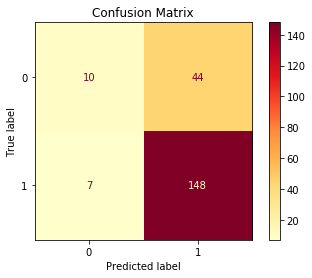

In [17]:

def LogReg(data, label):
    
    y_data = data.loc[:,['G3']]
    x_data = data.loc[:, data.columns != 'G3']
    
    
    #stampa alcune statistiche, le features create tramite dummy non si comportano in maniera corretta
    #logit_model=sm.Logit(y_data,x_data)
    #result=logit_model.fit()
    #print(result.summary2())
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=41)

    logreg = LogisticRegression(max_iter = 500, solver='liblinear')
    
    parameters = {'penalty':('l1', 'l2'), 'C':[ 0.1, 1, 10], 'class_weight':(None, 'balanced')}
    
    #gs = GridSearchCV(logreg, parameters, cv=10, scoring='f1' )
    gs = GridSearchCV(logreg, parameters, cv=10 )
    
    gs.fit(x_train, y_train.values.ravel())
    
    y_pred = gs.predict(x_test)
    
    #print('The accuracy of Logistic Regression model is %.5f' %gs.score(x_test, y_test))
    
    print('Best accuracy score obtained with cross-validation is: %.4f  +/- %.4f  obtained with params: %r' %(gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_] * 2, gs.best_params_ ))
    print()
    
    print(classification_report(y_test, y_pred))
        
    best_estimators[label] = gs.best_estimator_
    
    value_comparison_w['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_w['precision'].append(round(precision_score(y_test, y_pred, average='weighted'), 3))
    value_comparison_w['recall'].append(round(recall_score(y_test, y_pred, average='weighted'),3))
    value_comparison_w['f1'].append(round(f1_score(y_test, y_pred, average='weighted'), 3))
    
    value_comparison_macro['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_macro['precision'].append(round(precision_score(y_test, y_pred, average='macro'), 3))
    value_comparison_macro['recall'].append(round(recall_score(y_test, y_pred, average='macro'),3))
    value_comparison_macro['f1'].append(round(f1_score(y_test, y_pred, average='macro'), 3))
    

    disp = plot_confusion_matrix(gs, x_test, y_test, cmap=plt.cm.YlOrRd, values_format = 'g')
    disp.ax_.set_title('Confusion Matrix')
    
    plt.show()
   
   
    
    
#print('Logistic regression using value of G1 and G2')

#LogReg(dataMatExt, 'lr-mat')

dataNoValutation = dataMatExt.loc[:, dataMatExt.columns != 'G2']
dataNoValutation = dataNoValutation.loc[:, dataNoValutation.columns != 'G1']

#print('Logistic regression without value of G1 and G2')
#print()
#LogReg(dataNoValutation, 'lr-noVal')

#finalData = pd.DataFrame(norm_data, columns = finalData.columns)

#print('Logistic regression after feature selection')
LogReg(finalData, 'lr-final')

#print('Logistic regression Port')
#LogReg(dataPorExt, 'lr-por')



Compared to tests done previously and not reported, the feature selection has undoubtedly given benefits, this shows that most of the features present in the initial dataset, were nothing but noise as far as our results are concerned.
As we can see from the confusion matrix the model tends to predict the samples as belonging to class 1, so to a sufficient grade, this because they are in a much larger number and then the model has moved in this direction, in fact among the parameters chosen we can observe two things.

The first is that the penalty used is l2, which never completely zeros the coefficients of a predictor, a sign that all those chosen have at least a slight influence on the result.

The second is the class_weight that has been put to None, this is obvious because the model tending to predict the result as sufficient, benefits from the fact that both classes have the same weight. In fact, if balanced was used, as I did in some runs, the result could be even 10 percentage points lower because the errors on the samples in the minority (those of insufficient grades) would be more considered.



### Decision Tree 

The **Decision Tree** is a prediction algorithm used both for regression and classification, in our case we will use it for the latter. In the construction of a Decision Tree we divide the space where the samples reside in various regions, these splits are made on the value of a predictor for each split, trying to minimize the RSS, if we are talking about regression, or classification error rate, in case of classification.
We continue to make splits until the leaves (terminal nodes) have less than a minimum number of samples decided a priori. 
Then when a new sample arrives to assign a class you follow the split rules and once assigned to a given leaf you give it the most common label inside it. 

Since the classification error rate is not sensitive enough for tree growing, two other measures are used, Gini index and cross-entropy.

Gini index represents a measure of the total variance across k classes, it indicates the purity of a node and therefore a small value indicates that in that given node there are mainly samples of only one class, its formula is:

$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

Cross-entropy is an alternative to Gini and also indicates the purity of the node, its formula is:

$$D = -\sum_{k=1}^K \hat{p}_{mk} log \hat{p}_{mk}$$

The parameters on which the tuning will be performed are:

+ **max_depth** : default=None
        The maximum depth of the tree. 
        value = from 10 to 100, step =10


+ **criterion** :  default='gini'
        The function to measure the quality of a split, 'gini' for the Gini impurity (uses Gini index) and 'entropy' for    the information gain (uses cross-entropy).
        value = ('gini', 'entropy')


+ **min_samples_split** : default=2
        The minimum number of samples required to split an internal node.
        value = from 5 to 50, step =5




Best accuracy score obtained with cross-validation is: 0.8072  (+/- 0.0700)  obtained with params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 45}

              precision    recall  f1-score   support

           0       0.47      0.25      0.33        60
           1       0.75      0.89      0.81       149

    accuracy                           0.70       209
   macro avg       0.61      0.57      0.57       209
weighted avg       0.67      0.70      0.67       209





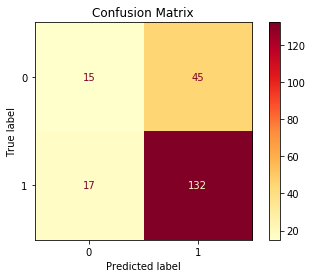

In [18]:
def DecT(data, label):
    
    y_data = data.loc[:,['G3']]
    x_data = data.loc[:, data.columns != 'G3']
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier()
    
    #path = clf.cost_complexity_pruning_path(X_train, y_train)
    #ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    parameters = {
    'max_depth': range(10, 100, 10),
    #'max_features': ['sqrt', 'log2', 'auto', None], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(5,50,5)
    }
    
    
    #gs = GridSearchCV(clf, parameters, cv=10, scoring='f1' )
    gs = GridSearchCV(clf, parameters, cv=10 )
    
    gs.fit(x_train, y_train.values.ravel())
    
    y_pred = gs.predict(x_test)
    
    #print('The accuracy of Decision Tree model is %.5f' %gs.score(x_test, y_test))
    print('Best accuracy score obtained with cross-validation is: %.4f  (+/- %.4f)  obtained with params: %r' %(gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_] *2, gs.best_params_ ))
    print()
    print(classification_report(y_test, y_pred))
    
    print()
       
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        if (mean > 0.91):
            print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    
    best_estimators[label] = gs.best_estimator_
    
    value_comparison_w['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_w['precision'].append(round(precision_score(y_test, y_pred, average='weighted'), 3))
    value_comparison_w['recall'].append(round(recall_score(y_test, y_pred, average='weighted'),3))
    value_comparison_w['f1'].append(round(f1_score(y_test, y_pred, average='weighted'), 3))
    
    value_comparison_macro['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_macro['precision'].append(round(precision_score(y_test, y_pred, average='macro'), 3))
    value_comparison_macro['recall'].append(round(recall_score(y_test, y_pred, average='macro'),3))
    value_comparison_macro['f1'].append(round(f1_score(y_test, y_pred, average='macro'), 3))
    

    disp = plot_confusion_matrix(gs, x_test, y_test, cmap=plt.cm.YlOrRd, values_format = 'g')
    disp.ax_.set_title('Confusion Matrix')
    
    plt.show()
    
    
    x_features=[]
    y_features = []
    for x,y in zip(x_train.columns, gs.best_estimator_.feature_importances_):
        if (y>0.0):
            x_features.append(x)
            y_features.append(y)
            
    
    fig = go.Figure()

    fig.add_trace(go.Bar(x=x_features, y=y_features,
                    marker_color=colors[2],
                    name='features importance'
                    ))
    fig.update_layout(
        yaxis_title = 'features importance',
        xaxis_title = 'features',
        title = 'Decision Tree features importance'
    )
    fig.show()
    
#DecT(dataNoValutation, 'dt-noVal')

DecT(finalData, 'dt-final')
    
    

Observing our table we can see that the Decision Tree obtains slightly worse results than the logistic regression in terms of total accuracy and f1-score, but there is an improvement in the values for the class with label 0. This indicates that even with slightly worse results, these results are slightly less affected by the large presence of samples related to class 1.

The following table instead shows the features related to their importance compared to the classification, underlining once again how *failures* is the parameter that influences the choice the most.
To try to further improve these results I try to use Random Forest.



### Random Forest

A Random Forest is an ensemble that has Decision Trees as main blocks, this one thickens a chosen number of Decision Tree each iteration on a subsample of the original dataset (like bagging) and each time on a different subset of features. This allows you to remedy the high variance that characterizes Decision Tree and improve its predictive capabilities (especially by preventing over-fitting) in return for a high computational load, especially if you choose to use many trees.

The parameters on which you have chosen to operate the tuning are the same as in Decision Tree, with the addition of:

+ **n_estimators** : default=100
        The number of trees in the forest.
        

Best accuracy score obtained with cross-validation is: 0.8228  (+/- 0.0592)  obtained with params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.53      0.30      0.38        60
           1       0.76      0.89      0.82       149

    accuracy                           0.72       209
   macro avg       0.64      0.60      0.60       209
weighted avg       0.69      0.72      0.70       209




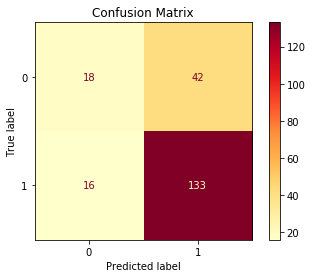

In [19]:
rf_params = {}

def RandF(data, label):
    
    y_data = data.loc[:,['G3']]
    x_data = data.loc[:, data.columns != 'G3']
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    clf = RandomForestClassifier()
    
    
    parameters = {
        #'bootstrap': [True, False],
        'max_depth': [ 30, 40, 50, 60, 70, None],
        #'max_features': ['auto', 'sqrt'],
        #'min_samples_leaf': [1, 2, 4],
        'min_samples_split': range(5,25,5),
        'n_estimators': [100, 200]
    }


    gs = GridSearchCV(clf, parameters, cv=10 )
    #gs = GridSearchCV(clf, parameters, cv=10, scoring='f1' )
    
    gs.fit(x_train, y_train.values.ravel())
    
    y_pred = gs.predict(x_test)
    
    #print('The accuracy of Random Forest model is %.5f' %gs.score(x_test, y_test))
    print('Best accuracy score obtained with cross-validation is: %.4f  (+/- %.4f)  obtained with params: %r' %(gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_] *2, gs.best_params_ ))
    print()
    #rf_params = gs.best_params_
    
    for x,y in gs.best_params_.items():
        rf_params[x] = [y]
    
    print(classification_report(y_test, y_pred))
    
    print()
    
    best_estimators[label] = gs.best_estimator_
    
    value_comparison_w['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_w['precision'].append(round(precision_score(y_test, y_pred, average='weighted'), 3))
    value_comparison_w['recall'].append(round(recall_score(y_test, y_pred, average='weighted'),3))
    value_comparison_w['f1'].append(round(f1_score(y_test, y_pred, average='weighted'), 3))
    
    value_comparison_macro['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_macro['precision'].append(round(precision_score(y_test, y_pred, average='macro'), 3))
    value_comparison_macro['recall'].append(round(recall_score(y_test, y_pred, average='macro'),3))
    value_comparison_macro['f1'].append(round(f1_score(y_test, y_pred, average='macro'), 3))
    

    disp = plot_confusion_matrix(gs, x_test, y_test, cmap=plt.cm.YlOrRd, values_format = 'g')
    disp.ax_.set_title('Confusion Matrix')
    
    plt.show()
    
#RandF(dataMatExt, 'dt-mat')
 
#RandF(dataNoValutation, 'rf-noVal')

RandF(finalData, 'rf-final')


Random forest should decrease the variance of the decision tree, but in our case we can see that the improvement is barely noticeable, so that for the class with label 0, the one that gives us more problems, the results remain virtually identical. This may suggest that the problem with our classifier is not an optimal correlation between the predictors and the outcomes we are looking for, as we assumed at the beginning of this research.

However, it may be useful to observe how the optimal parameters found on the validation set are applied with an increasing number of trees (parameter *n_estimator*) and see if this change can lead to improvements of some kind.

In [20]:
def RandF_Estimators(data):
    
    y_data = data.loc[:,['G3']]
    x_data = data.loc[:, data.columns != 'G3']
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    clf = RandomForestClassifier()
    
    
    parameters = rf_params
    parameters['n_estimators'] = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    

    gs = GridSearchCV(clf, parameters, cv=10 )
    #gs = GridSearchCV(clf, parameters, cv=10, scoring='f1' )
    
    gs.fit(x_train, y_train.values.ravel())
    
    y_pred = gs.predict(x_test)
    
    #print('The accuracy of Random Forest model is %.5f' %gs.score(x_test, y_test))
    
        
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    xval = []
    yval = []
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        xval.append(params['n_estimators'])
        yval.append(mean)
    print()
    
    
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=xval,
        y=yval,
        marker=dict(color="blue", size=12),
        mode='lines+markers',
        name="Features ranking",
    ))

    fig.update_layout(
        title="Random forest results with optimal params",
        xaxis_title="Number of Estimators",
        yaxis_title = 'Accuracy'
    )
    fig.show()
    
RandF_Estimators(finalData) 


Not even this experiment has led to the hoped-for results, in fact the accuracy variation seems to be quite random and in such a small range that it cannot allow observations worthy of note or justifying changes in the chosen model. I am therefore satisfied with the parameters found in the first phase of the research.


### Support Vector Machine

**SVM** or *Support Vector Machine* is a model that allows to find the hyperplan that separates the points of our dataset in the two classes we decided, not only separating them but with the maximum possible margin. The points that reside on the margin are called support vector and are the only ones that influence the choice of decision boundaries.

The decision boundaries can be simply linear, so we are talking about a linear SVM, or if we are in the presence of data linearly not separable we can use the kernel trick, i.e. bring the data in a space with an extra dimension in which they will be linearly separable $x->\phi(x)$.
To do this we need to map the features in a higher dimensional space, this will obviously imply that in the original dimension the decision boundaries will no longer be linear.

To simplify the calculations since the features are only inside the inner product, instead of calculating $\phi$ for each $x$, you can apply the kernel function whose result corresponds to the inner product of the features, this greatly simplifies the situation. 

$$Kernel function: K(x1,x2) = \phi(x_1)^T\phi(x_2)$$

Kernel function used will be one of the parameters that we will be tuning in our SVC (Support Vector Classification), along with the others listed below:

+ **kernel** : default='rbf'
        Specifies the kernel type to be used in the algorithm. 
        value = ( 
            'linear' : linear kernel -> 
$$K(x1,x2)=x1*x2$$      
            'rbf' : radial basis function -> 
$$K(x1,x2)=exp(−γ(∥x1−x2∥^2)$$
            )
            
+ **C** : default=1.0
        Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
        value = (0.01, 0.1, 1, 10, 100, 1000)
        
+ **gamma** : default= 'scale'
        Kernel coefficient for 'rbf' and other kernel, ignored by linear kernel.
        value = (1e-3, 1e-4, 1e-5)

Best accuracy score obtained with cross-validation is: 0.8228  (+/- 0.0631)  obtained with params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.53      0.17      0.25        60
           1       0.74      0.94      0.83       149

    accuracy                           0.72       209
   macro avg       0.63      0.55      0.54       209
weighted avg       0.68      0.72      0.66       209



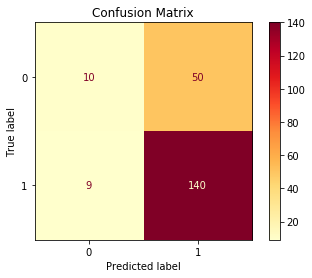

In [21]:
def mySVC(data, label):
    
    y_data = data.loc[:,['G3']]
    x_data = data.loc[:, data.columns != 'G3']
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    clf = SVC(probability=True)
    
    parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]}]
    #parameters = [{'kernel': ['linear'], 'C': [1]}]
    
    #gs = GridSearchCV(clf, parameters, cv=10, scoring='f1' )
    gs = GridSearchCV(clf, parameters, cv=10 )
    
    gs.fit(x_train, y_train.values.ravel())
    
    y_pred = gs.predict(x_test)
    
    #print('The accuracy of SVM model is %.5f' %gs.score(x_test, y_test))
    print('Best accuracy score obtained with cross-validation is: %.4f  (+/- %.4f)  obtained with params: %r' %(gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_] *2, gs.best_params_ ))
    print()
    print(classification_report(y_test, y_pred))
    
    '''
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    '''
    
    best_estimators[label] = gs.best_estimator_
    
    value_comparison_w['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_w['precision'].append(round(precision_score(y_test, y_pred, average='weighted'), 3))
    value_comparison_w['recall'].append(round(recall_score(y_test, y_pred, average='weighted'),3))
    value_comparison_w['f1'].append(round(f1_score(y_test, y_pred, average='weighted'), 3))
    
    value_comparison_macro['accuracy'].append(round(accuracy_score(y_test, y_pred), 3))
    value_comparison_macro['precision'].append(round(precision_score(y_test, y_pred, average='macro'), 3))
    value_comparison_macro['recall'].append(round(recall_score(y_test, y_pred, average='macro'),3))
    value_comparison_macro['f1'].append(round(f1_score(y_test, y_pred, average='macro'), 3))
    
    disp = plot_confusion_matrix(gs, x_test, y_test, cmap=plt.cm.YlOrRd, values_format = 'g')
    disp.ax_.set_title('Confusion Matrix')
    
    plt.show()
    

#mySVC(dataNoValutation, 'svm-noVal')
mySVC(finalData, 'svm-final')

As it was predictable also our SVC didn't have results that were too far away from the other classifiers, on the contrary from the gridsearch it emerged that between all set of parameters the results always remained very similar, showing that with our dataset we couldn't have obtained better results from our classifier. In particular the recall for class 0 is one of the worst, a symptom of how more complex classifiers do not work at all well on our dataset.




## Comparison between classifier

Let's go then to analyze at the end of this path what could be the most suitable classifier that I would choose in case this problem was submitted to me and I should get the best possible results. 

To compare the various results I will use different metrics that I have already shown previously plus a new one, which I will introduce in the next lines.

### ROC curve
The **ROC curve** or **Receiver Operating Characteristics curve**  is another highly regarded measure when it comes to evaluating the effectiveness of a classifier and is based on the total proportion of correctly classified samples.

The two concepts that characterize it are :
+ *true positive rate* or *sensitivity*, indicates the proportion of positives identified with respect to samples that are really positive.
+ *false positive rate*, which instead indicates the samples identified as positve, but which instead belong to the negative population. It is also called 1-specificity, where specificity equals the true negative rate.

The graph representing the ROC curves goes to show the relationship between these two measures without obviously knowing the threshold that will be established to assign the positive class, so in our case it will be 0.50.
The measure that indicates the goodness of a classifier is the **AUC** or *Area Under the Curve*, that summarizes his performance over all possible probability cutoffs (various possible threshold), the greater is this area, the better is the performance of the classifier under examination. The AUC of a random classifier is 0.5 and its roc curve is represented by the dashed line, on the contrary the jagged curved lines represent the various classifiers used that tend to the optimal point located at the top left of the graph, where obviously we have 1 of true positive rate and 0 of false positive rate.

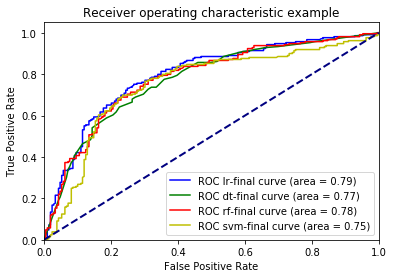

In [22]:
'''
 logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, gs.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression class 1 (area = %0.2f)' % logit_roc_auc)
    plt.plot(fnr, tnr, label='Logistic Regression class 0 (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()    
'''

y_data = finalData.loc[:,['G3']]
x_data = finalData.loc[:, finalData.columns != 'G3']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
y_test_roc = []

#print(y_test.values.ravel())

for n in y_test.values.ravel():
    if(n):
        y_test_roc.append([0,1])
    else:
        y_test_roc.append([1,0])
#np.array([([0, 1] if y else [1, 0]) for y in y_test])
    
plt.figure()
lw = 2
aucs = []

#print(y_test_roc)
#print(clf.predict_proba(x_test).ravel())
#print(clf.predict_proba(x_test))

#print(clf.predict_proba(x_test)[:, 0])

colors = ['b','g', 'r', 'y', 'k', 'w']
cont = 0
for label, clf in best_estimators.items():
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    score = clf.predict_proba(x_test)
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve([tup[i] for tup in y_test_roc], score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    #print(type(clf.predict_proba(x_test).ravel()))

    # Compute micro-average ROC curve and ROC area
    y_test_roc_ravel = []
    for (f,s) in y_test_roc:
        y_test_roc_ravel.append(f)
        y_test_roc_ravel.append(s)
        
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc_ravel, score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    #aucs.append(roc_auc['micro'])
    value_comparison_w['roc'].append(round(roc_auc['micro'], 3))
    value_comparison_macro['roc'].append(round(roc_auc['micro'], 3))
    
    plt.plot(fpr['micro'], tpr['micro'], color=colors[cont], label='ROC %s curve (area = %0.2f)' %(label, roc_auc["micro"]))
    cont+= 1


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()



As we can see the various classifiers don't stand out too much even in this metric, with Logistic Regression and Random Forest performing slightly better.
Let's take all the data collected so far and put them in tables to help us visualize the whole thing.


In [23]:



fig = go.Figure(data=[go.Table(
    columnwidth = [120, 80,80, 80, 80, 80],
    header=dict(values=list(value_comparison_w.keys()),
                line_color='darkslategray',
                fill_color='paleturquoise',
                align='center',
                font=dict(size=14)),
    cells=dict(values=list(value_comparison_w.values()), 
               line_color='darkslategray',
               fill_color=['paleturquoise','white', 'rgb(239, 243, 255)','white', 'rgb(239, 243, 255)' ],
               align='left'))
])
fig.update_layout(
    height=300,)
fig.show()

fig = go.Figure(data=[go.Table(
    columnwidth = [120, 80,80, 80, 80, 80],
    header=dict(values=list(value_comparison_macro.keys()),
                line_color='darkslategray',
                fill_color='paleturquoise',
                align='center',
                font=dict(size=14)),
    cells=dict(values=list(value_comparison_macro.values()), 
               line_color='darkslategray',
               fill_color=['paleturquoise','white', 'rgb(239, 243, 255)','white', 'rgb(239, 243, 255)' ],
               align='left'))
])

fig.update_layout(
    height=300)
fig.show()


From these tables we can have a more immediate view, it's clear that if we rely only on accuracy we could say that we have obtained more than positive results, especially considering the fact that we have removed any reference to grades related to the student's recent past (*G1* and *G2*). This is obviously not the reality of the facts as we must also observe the other metrics indicated. 
In particular the two tables indicate, one the results in case we consider the various metrics, such as precision, recall and f1-score, as average between the same metrics on label 0 and label 1, in practice we try to go back to the ideal case where the dataset is perfectly divided between the two classes. The second takes into account the difference in number between the two classes.

Which of the two to give more weight depends on the purposes of our research. We may have an interest in correctly identifying such a class than another, so for example I could give more weight to an error of one label than another and so on. 

In our case there are no big differences beetween the two better classifier, and although the Logistic Regression has a higher accuracy, I would choose Random Forest especially if you want to give particular importance to the failures of the boys and want to identify them, this is because it had a higher precision and recall on class 0, this is evident because in the table **Macro Average** its results are better, a symptom of how it performs better on class 0 and slightly worse on class 1. 

In our case, since this is a study based on being able to understand the failure factors of Portuguese students and identify students at risk, it seems logical to pay more attention to this factor.





### Bibliography
1. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. -  An Introduction to Statistical Learning with Applications in R


2. P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 
    http://www3.dsi.uminho.pt/pcortez/student.pdf